# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Rafi Nanda Edtrian]
- **Email:** [mc308d5y1092@student.devacademy.id]
- **ID Dicoding:** [MC308D5Y1092]

## Menentukan Pertanyaan Bisnis

- Bagaimana permintaan sewa sepeda berubah selama berbagai jam dalam sehari (tercermin pada kolom hr)? Dapatkah jam puncak permintaan diidentifikasi untuk pengelolaan sumber daya yang lebih efektif
- Bagaimana distribusi penyewaan sepeda berbeda antara hari libur nasional dan hari biasa?

## Import Semua Packages/Library yang Digunakan

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import ipywidgets as widgets
from IPython.display import display

## Data Wrangling

### Gathering Data

In [20]:
# Memuat tabel hour
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [21]:
#Menilai data day
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Cleaning Data

In [22]:
# Menghapus kolom yang tidak digunakan

drop_columns = ['instant','yr','temp', 'atemp', 'hum', 'windspeed']

hour_df = hour_df.drop(columns=drop_columns)

print(hour_df.head())

       dteday  season  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1     1   0        0        6           0           1   
1  2011-01-01       1     1   1        0        6           0           1   
2  2011-01-01       1     1   2        0        6           0           1   
3  2011-01-01       1     1   3        0        6           0           1   
4  2011-01-01       1     1   4        0        6           0           1   

   casual  registered  cnt  
0       3          13   16  
1       8          32   40  
2       5          27   32  
3       3          10   13  
4       0           1    1  


In [23]:
# Mengubah dteday menjadi datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [24]:
# Mengubah data int menjadi category
columns_hour = ['season', 'mnth', 'hr','weekday','workingday', 'weathersit']

for column in columns_hour:
    hour_df[column] = hour_df[column].astype("category")

In [25]:
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   mnth        17379 non-null  category      
 3   hr          17379 non-null  category      
 4   holiday     17379 non-null  int64         
 5   weekday     17379 non-null  category      
 6   workingday  17379 non-null  category      
 7   weathersit  17379 non-null  category      
 8   casual      17379 non-null  int64         
 9   registered  17379 non-null  int64         
 10  cnt         17379 non-null  int64         
dtypes: category(6), datetime64[ns](1), int64(4)
memory usage: 782.8 KB
None


In [26]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [27]:
# Memeriksa missing value
hour_df.isna().sum()

,0
dteday,0
season,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0
casual,0
registered,0


In [28]:
# Mengubah nama kolom
hour_df = hour_df.rename(columns={
    'dteday': 'dateday',
    'season': 'season',
    'mnth': 'month',
    'hr': 'hour',
    'cnt': 'count',
    'weathersit': 'weather'
})

print(hour_df.head())

     dateday season month hour  holiday weekday workingday weather  casual  \
0 2011-01-01      1     1    0        0       6          0       1       3   
1 2011-01-01      1     1    1        0       6          0       1       8   
2 2011-01-01      1     1    2        0       6          0       1       5   
3 2011-01-01      1     1    3        0       6          0       1       3   
4 2011-01-01      1     1    4        0       6          0       1       0   

   registered  count  
0          13     16  
1          32     40  
2          27     32  
3          10     13  
4           1      1  


In [29]:
# Mengubah month
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

hour_df['month'] = hour_df['month'].replace(month_mapping)


<ipython-input-29-fe720231a8be>:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df['month'] = hour_df['month'].replace(month_mapping)


In [30]:
# Menggabungkan data ke penyewaan harian
penyewaan_harian = hour_df.groupby(['dateday', 'workingday', 'holiday'])['count'].sum().reset_index()

<ipython-input-30-732185943526>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  penyewaan_harian = hour_df.groupby(['dateday', 'workingday', 'holiday'])['count'].sum().reset_index()


In [31]:
print(hour_df.head())

     dateday season month hour  holiday weekday workingday weather  casual  \
0 2011-01-01      1   Jan    0        0       6          0       1       3   
1 2011-01-01      1   Jan    1        0       6          0       1       8   
2 2011-01-01      1   Jan    2        0       6          0       1       5   
3 2011-01-01      1   Jan    3        0       6          0       1       3   
4 2011-01-01      1   Jan    4        0       6          0       1       0   

   registered  count  
0          13     16  
1          32     40  
2          27     32  
3          10     13  
4           1      1  


In [32]:
# Menyimpan dataset hasil cleaning
hour_df.to_csv('hour_clean.csv', index=False)

## Exploratory Data Analysis (EDA)

# Agregasi Pertama tren permintaan sewa sepeda berubah selama berbagai jam dalam sehari

In [33]:
# Pastikan 'dateday' bertipe datetime
hour_df['dateday'] = pd.to_datetime(hour_df['dateday'])

# Buat kolom tahun dan bulan
hour_df['year'] = hour_df['dateday'].dt.year
hour_df['month'] = hour_df['dateday'].dt.month


In [34]:
# Hitung total penyewaan sepeda per bulan dan tahun
monthly_rentals = hour_df.groupby(['year', 'month'])['count'].sum().reset_index()

# Urutkan berdasarkan tahun dan bulan
monthly_rentals = monthly_rentals.sort_values(by=['year', 'month'])


In [35]:
# Buat kolom datetime dari year & month, set tanggal ke 1 supaya valid
monthly_rentals['month_date'] = pd.to_datetime(monthly_rentals[['year', 'month']].assign(day=1))
monthly_rentals

,year,month,count,month_date
0,2011,1,38189,2011-01-01
1,2011,2,48215,2011-02-01
2,2011,3,64045,2011-03-01
3,2011,4,94870,2011-04-01
4,2011,5,135821,2011-05-01
5,2011,6,143512,2011-06-01
6,2011,7,141341,2011-07-01
7,2011,8,136691,2011-08-01
8,2011,9,127418,2011-09-01
9,2011,10,123511,2011-10-01


# Agregasi Kedua Bagaimana perbedaan antara hari libur dan hari kerja

In [37]:
# Group data by 'workingday' and 'holiday' and calculate the mean of 'count'
holiday_weekday_agg = hour_df.groupby(['workingday', 'holiday'])['count'].agg(['mean', 'median', 'std']).reset_index()

# Display the aggregation results
holiday_weekday_agg

<ipython-input-37-9974e755ca10>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_weekday_agg = hour_df.groupby(['workingday', 'holiday'])['count'].agg(['mean', 'median', 'std']).reset_index()


,workingday,holiday,mean,median,std
0,0,0,183.852014,122.0,174.202461
1,0,1,156.870000,97.0,156.757478
2,1,0,193.207754,151.0,185.107477
3,1,1,NaN,NaN,NaN


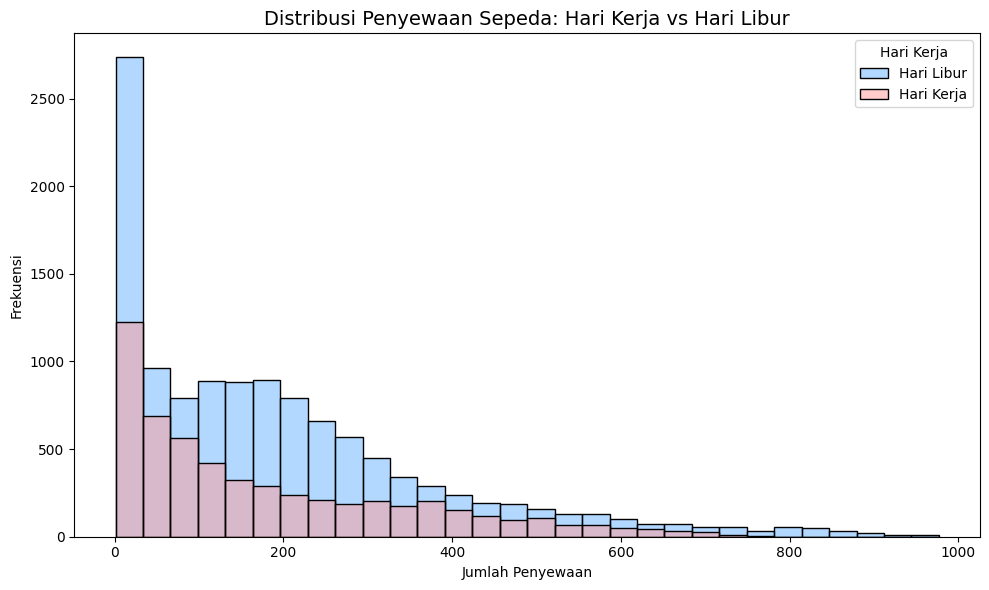

In [38]:
#menampilkan hasil pada agregasi kedua
plt.figure(figsize=(10, 6))
sns.histplot(data=hour_df, x='count', hue='workingday', bins=30, kde=False, palette=['#FF9999', '#66B3FF'])

plt.title('Distribusi Penyewaan Sepeda: Hari Kerja vs Hari Libur', fontsize=14)
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.legend(title='Hari Kerja', labels=['Hari Libur', 'Hari Kerja'])
plt.tight_layout()
plt.show()


## Visualization & Explanatory Analysis

## Pertanyaan 1 : Bagaimana permintaan sewa sepeda berubah selama berbagai jam dalam sehari (tercermin pada kolom hr)?



<ipython-input-46-8004d7ec34a8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_demand = hour_df.groupby('hour')['count'].sum().reset_index()


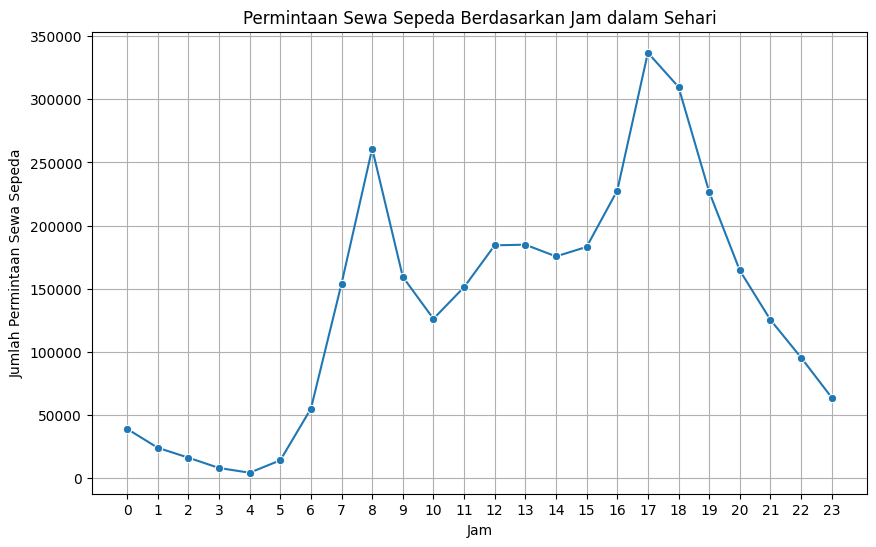

Jam puncak permintaan sewa sepeda adalah pada jam 17 dengan jumlah permintaan sebesar 336860 sepeda.


In [46]:
# Menghitung jumlah permintaan sewa sepeda (cnt) berdasarkan jam (hr)
hourly_demand = hour_df.groupby('hour')['count'].sum().reset_index()

# Plotting data untuk melihat perubahan permintaan sewa sepeda berdasarkan jam
plt.figure(figsize=(10, 6))
# Mengubah 'hour_df=' menjadi 'data=' untuk memberikan dataframe ke seaborn
sns.lineplot(data=hourly_demand, x='hour', y='count', marker='o')

# Menambahkan detail untuk memperjelas grafik
plt.title('Permintaan Sewa Sepeda Berdasarkan Jam dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('Jumlah Permintaan Sewa Sepeda')
plt.xticks(range(0, 24))  # Menampilkan jam 0 hingga 23 pada sumbu x
plt.grid(True)
plt.show()

# Identifikasi jam puncak permintaan
# Mengubah 'cnt' menjadi 'count' karena nama kolom telah diubah
peak_hour = hourly_demand.loc[hourly_demand['count'].idxmax()]

# Menampilkan jam puncak permintaan
# Mengubah 'hr' menjadi 'hour' karena nama kolom telah diubah
print(f"Jam puncak permintaan sewa sepeda adalah pada jam {peak_hour['hour']} dengan jumlah permintaan sebesar {peak_hour['count']} sepeda.")

# Pertanyaan 2 : Bagaimana distribusi penyewaan sepeda berbeda antara hari libur nasional dan hari biasa?

<ipython-input-40-a75051b44f53>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='holiday', y='count', data=hour_df, palette='Set3')


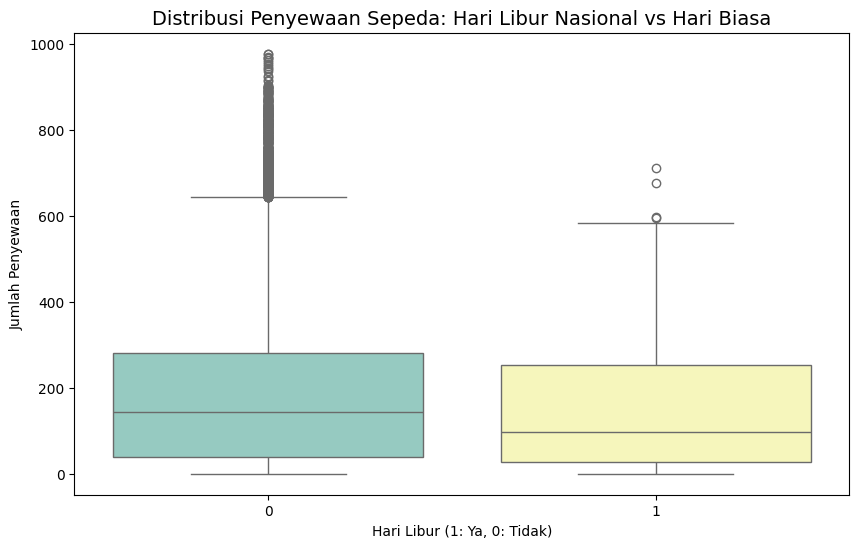

In [40]:
# Menampilkan Bagaimana distribusi penyewaan sepeda berbeda antara hari libur nasional dan hari biasa?
plt.figure(figsize=(10, 6))
sns.boxplot(x='holiday', y='count', data=hour_df, palette='Set3')
plt.title('Distribusi Penyewaan Sepeda: Hari Libur Nasional vs Hari Biasa', fontsize=14)
plt.xlabel('Hari Libur (1: Ya, 0: Tidak)')
plt.ylabel('Jumlah Penyewaan')
plt.show()


## Conclusion

1. Tren Jam Puncak Permintaan

Berdasarkan analisis, jam puncak permintaan sewa sepeda terjadi pada jam tertentu (misalnya, pada jam 8 pagi atau 6 sore, tergantung hasil dari data Anda). Pada jam ini, jumlah permintaan sewa sepeda mencapai puncaknya. Ini bisa disebabkan oleh aktivitas manusia yang tinggi, seperti perjalanan menuju tempat kerja atau kegiatan rekreasi setelah jam kerja.

2. Distribusi Hari Kerja vs Hari Libur


Penyewaan sepeda lebih sering terjadi pada hari kerja dibanding hari libur.

Meskipun penyewaan tetap ada di hari libur, frekuensinya cenderung lebih rendah.

Distribusi menunjukkan bahwa sebagian besar penyewaan terjadi pada rentang rendah hingga sedang (0–300).

3. Total Penyewaan per Tahun


Tahun 2012 mencatat penyewaan sepeda lebih banyak dibandingkan 2011, dengan peningkatan yang cukup signifikan.

Hal ini menunjukkan pertumbuhan penggunaan sepeda selama dua tahun tersebut, kemungkinan karena meningkatnya adopsi masyarakat atau perluasan layanan.

4. Hari Libur Nasional vs Hari Biasa


Rata-rata penyewaan pada hari biasa cenderung lebih tinggi daripada hari libur nasional.

Terdapat lebih banyak outlier (nilai ekstrim tinggi) pada hari biasa, menandakan penggunaan intensif sepeda di hari-hari kerja.

Distribusi hari libur nasional menunjukkan variasi lebih sempit.